![Alt Text](Customer_Segmentation_Clustering.gif)

# <center><b> "IMPORTING LIBRARIES" <center>

In [462]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
sns.set(style="whitegrid")
sns.set_palette("husl")

# <center><b> "LOADING DATA"

In [191]:
data = pd.read_csv("./marketing_campaign.csv", sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# <center><b> "DATA CLEANING"

In [194]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [196]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [198]:
data.shape

(2240, 29)

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [202]:
data.dropna(inplace=True)

# <Center> <b>"EXPLORING THE CATAGORICAL FEATURES"

In [205]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [207]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

# <center><B> "HANDLING OUTLIERS"

In [210]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [212]:
data['Income'].max()

np.float64(666666.0)

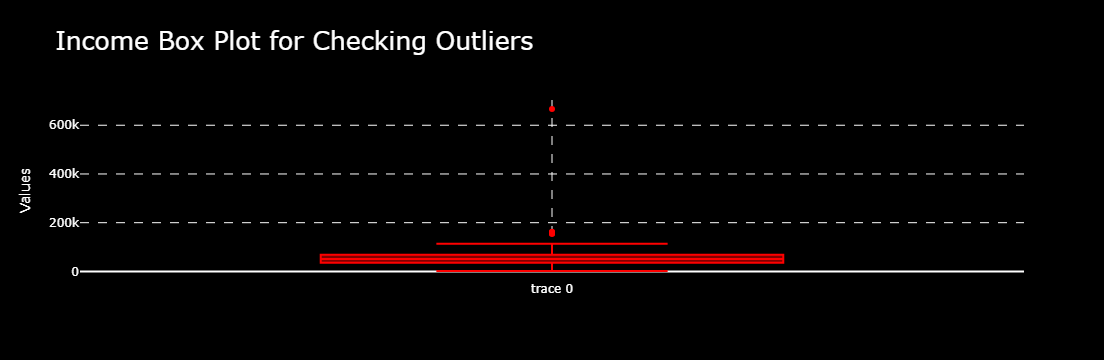

In [214]:
fig = go.Figure()
fig.add_traces(
    go.Box(
        y=data['Income'], marker=dict(color='red')
    )
)
fig.update_layout(
    title='Income Box Plot for Checking Outliers', yaxis_title = 'Values', title_font_size = 25, plot_bgcolor = 'black', paper_bgcolor='black', font=dict(color='white')
)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', griddash='dash')
fig.show()

In [216]:
data = data[data['Income'] < 600000]

# <center><B> "FEATURE ENGINEERING"
### <center> Feature Engineering for Enhanced Data Insight

In [219]:
# Converting "Dt_Customer" to Date Time Format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [221]:
#Feature Engineering
#Age of customer today
data['Age'] = 2024 - data['Year_Birth']

# Total Spendings
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [223]:
data["Living_with"] = data['Marital_Status'].map({
    "Married"  :   "Partner",
    "Together"  :  "Partner",
    "Single"     : "Alone",
    "Divorced"    :"Alone",
    "Widow"        :"Alone",
    "Alone"         :"Alone",
    "Absurd"        :"Alone",
    "YOLO"         :"Alone"
})

In [225]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [227]:
data['Family_size'] = data['Children'] + data['Living_with'].replace({"Partner":2, "Alone":1})

C:\Users\muham\AppData\Local\Temp\ipykernel_2160\3280103454.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [229]:
data['Is_parent'] = np.where(data['Children'] > 0, 1, 0)

In [231]:
data['Education'] = data['Education'].replace({
    "Graduation":    "Graduate",
    "PhD":            "Postgraduate",
    "Master":         "Postgraduate",
    "2n Cycle":       "Undergraduate",
    "Basic":           "Undergraduate"
})

In [233]:
data.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_with,Children,Family_size,Is_parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,1617,Alone,0,1,0


In [235]:
data = data.rename(columns={
    'MntWines': "Wines",
    'MntFruits': 'Friuts',
    'MntMeatProducts':'Meat',
    'MntFishProducts':"Fish",
    'MntSweetProducts':"Sweet",
    "MntGoldProds":"Gold"
})

In [237]:
cols_to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data[cols_to_drop].head(1)

,Marital_Status,Dt_Customer,Z_CostContact,Z_Revenue,Year_Birth,ID
0,Single,2012-09-04,3,11,1957,5524


In [239]:
data.drop(columns=cols_to_drop, inplace=True)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2215 non-null   object 
 1   Income               2215 non-null   float64
 2   Kidhome              2215 non-null   int64  
 3   Teenhome             2215 non-null   int64  
 4   Recency              2215 non-null   int64  
 5   Wines                2215 non-null   int64  
 6   Friuts               2215 non-null   int64  
 7   Meat                 2215 non-null   int64  
 8   Fish                 2215 non-null   int64  
 9   Sweet                2215 non-null   int64  
 10  Gold                 2215 non-null   int64  
 11  NumDealsPurchases    2215 non-null   int64  
 12  NumWebPurchases      2215 non-null   int64  
 13  NumCatalogPurchases  2215 non-null   int64  
 14  NumStorePurchases    2215 non-null   int64  
 15  NumWebVisitsMonth    2215 non-null   int64 

In [243]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Friuts', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_with', 'Children', 'Family_size',
       'Is_parent'],
      dtype='object')

In [247]:
data[['Age','Living_with', 'Children', 'Family_size', 'Income', 'Spent', 'Complain']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2215.0,55.183296,11.987000,28.0,47.0,54.0,65.0,131.0
Children,2215.0,0.947178,0.749230,0.0,0.0,1.0,1.0,3.0
Family_size,2215.0,2.592325,0.905885,1.0,2.0,3.0,3.0,5.0
Income,2215.0,51969.861400,21526.320095,1730.0,35284.0,51373.0,68487.0,162397.0
Spent,2215.0,607.321445,602.925291,5.0,69.0,397.0,1048.0,2525.0
Complain,2215.0,0.009481,0.096929,0.0,0.0,0.0,0.0,1.0


<B><center> <h1> EXPLORATORY DATA ANALYSIS (EDA)

### <center > Univariate Analysis

In [256]:
data.head(1)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Friuts,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,Children,Family_size,Is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67,1617,Alone,0,1,0


In [294]:
continous_columns = ['Age', 'Spent', 'Income']
categorical_colmns = ['Education', 'Living_with', 'Children', 'Family_size', 'Complain']

all_columns = continous_columns + categorical_colmns
num_rows = (len(all_columns) + 1) // 2

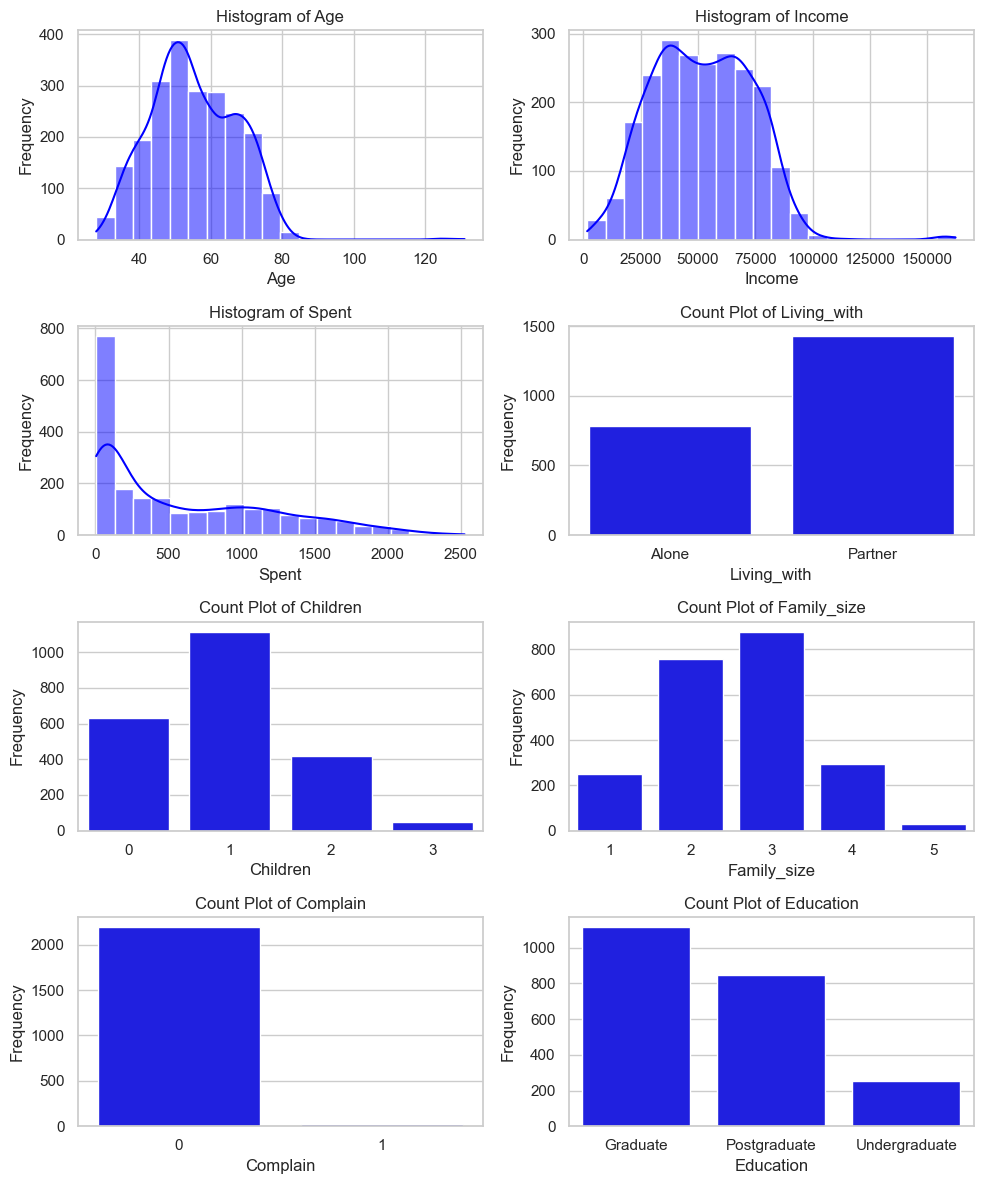

In [332]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_with', 'Children', 'Family_size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns


num_rows = (len(all_columns) + 1) // 2


fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()


for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=data, x=col, bins=20, ax=axes[i], kde=True, color='blue')  
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=data, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)  


plt.tight_layout()
plt.show()

### <center> Bivariate Analysis  (features correlation)

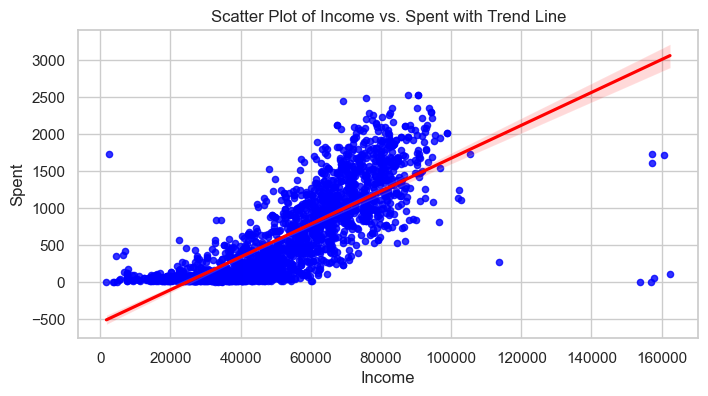

In [343]:
plt.figure(figsize=(8, 4))
sns.regplot(x=data['Income'], y=data['Spent'], data=data, scatter_kws={'s':20}, line_kws={'color':'red'}, color='blue')

plt.title("Scatter Plot of Income vs. Spent with Trend Line")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.show()

### <center> Average Spent x Education and Family_Size

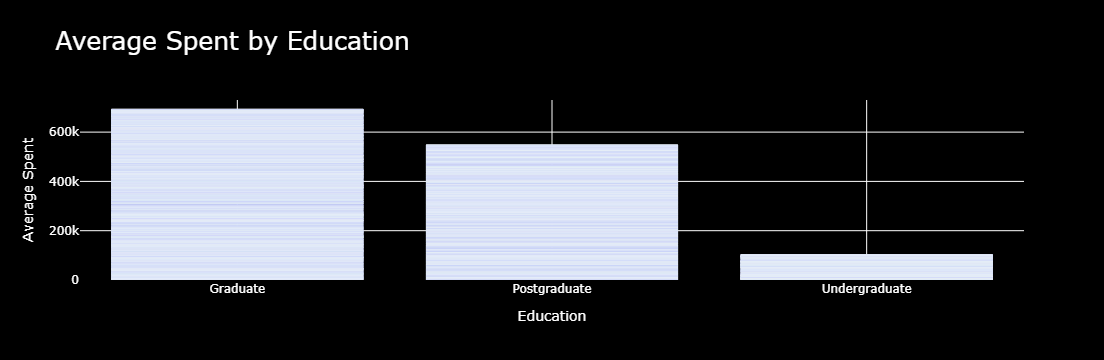

In [353]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=data['Education'], y=data['Spent'])
)

fig.update_layout(
    title='Average Spent by Education',
    yaxis_title='Average Spent',
    xaxis_title='Education',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)

fig.show()

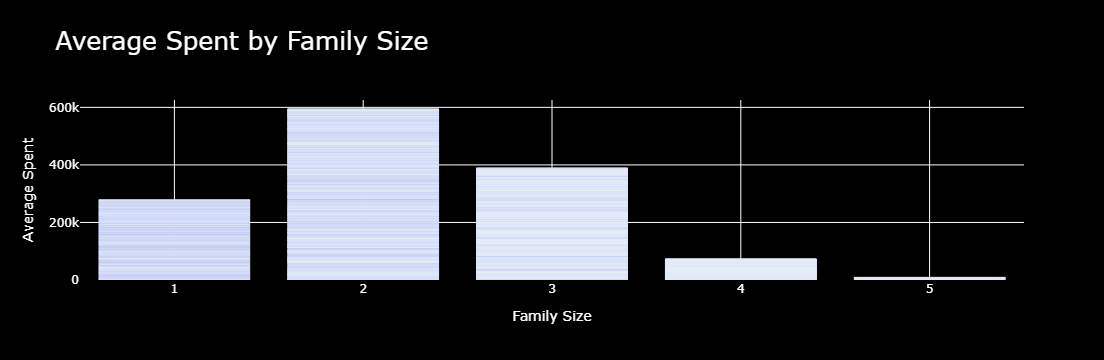

In [368]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=data['Family_size'], y=data['Spent'])
)

fig.update_layout(
    title='Average Spent by Family Size',
    yaxis_title='Average Spent',
    xaxis_title='Family Size',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)

fig.show()

## <center> Places of Purchase

In [364]:
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        data['NumWebPurchases'].sum(),
        data['NumCatalogPurchases'].sum(),
        data['NumStorePurchases'].sum(),
        data['NumDealsPurchases'].sum()
    ]
}
df_totals = pd.DataFrame(totals)
df_totals

,Purchase Type,Total Purchases
0,NumWebPurchases,9050
1,NumCatalogPurchases,5918
2,NumStorePurchases,12852
3,NumDealsPurchases,5145


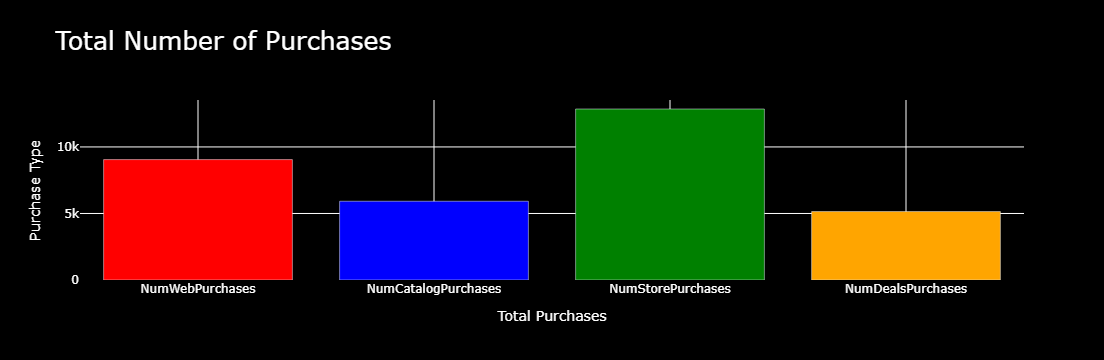

In [372]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=df_totals['Purchase Type'], y=df_totals['Total Purchases'], marker=dict(color=['red', 'blue', 'green', 'orange']))
)

fig.update_layout(
    title='Total Number of Purchases',
    yaxis_title='Purchase Type',
    xaxis_title='Total Purchases',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)

fig.show()

### <center> Analyzing the Campaigns performance:

In [384]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
counts = data[campaigns].sum().reset_index()
counts.columns = ['Campaign', 'Count of Acceptances']

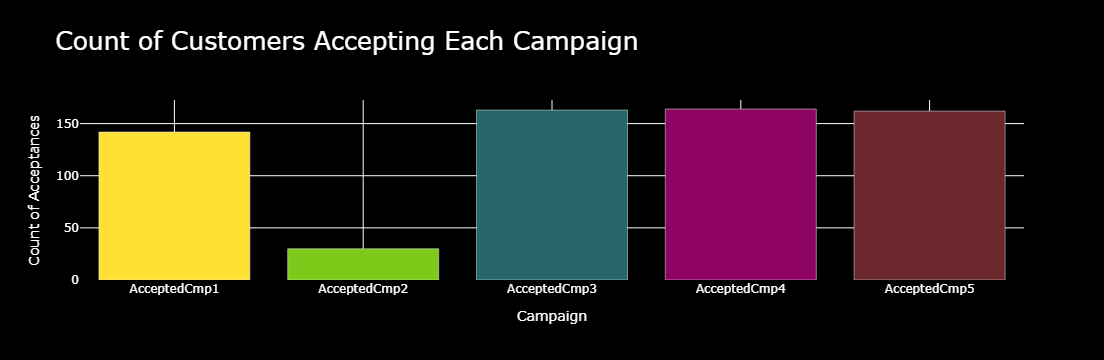

In [396]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=counts['Campaign'], y=counts['Count of Acceptances'], marker=dict(color=['#FFE133', '#7EC919', '#27666A', '#8F0362', '#6A272C']))
)

fig.update_layout(
    title='Count of Customers Accepting Each Campaign',
    yaxis_title='Count of Acceptances',
    xaxis_title='Campaign',
    title_font_size=25,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='white', zeroline=False)

fig.show()

# <CENTER>DATA PREPROCESSING

In [414]:
cat_cols = (data.dtypes == 'object')
object_cols = list(cat_cols[cat_cols].index)
object_cols

['Education', 'Living_with']

In [416]:
data['Education'].value_counts()

Education
Graduate         1115
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64

In [420]:
education_mapping = {
    'Undergraduate':0,
    'Postgraduate':1,
    'Graduate':2
}
data['Education'] = data['Education'].map(education_mapping)

In [428]:
le = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(le.fit_transform)

In [434]:
print(data['Living_with'].value_counts(), data['Education'].value_counts())

Living_with
1    1429
0     786
Name: count, dtype: int64 Education
2    1115
1     846
0     254
Name: count, dtype: int64


In [436]:
ds = data.copy()

In [442]:
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
ds.drop(columns=cols_del, inplace=True)
scaler = StandardScaler()
scaler.fit(ds)

StandardScaler()

In [444]:
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Friuts,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_with,Children,Family_size,Is_parent
0,0.894550,0.286604,-0.822585,-0.929363,0.310113,0.977779,1.548973,1.689714,2.453932,1.484340,0.849633,0.352088,1.428103,2.504074,-0.554500,0.693215,0.986016,1.675011,-1.348357,-1.264487,-1.758153,-1.580889
1,0.894550,-0.261407,1.040427,0.908618,-0.380899,-0.872375,-0.637338,-0.718196,-0.651178,-0.634081,-0.733043,-0.167829,-1.125846,-0.571253,-1.169839,-0.131420,1.236344,-0.962727,-1.348357,1.405522,0.450131,0.632555
2,0.894550,0.912723,-0.822585,-0.929363,-0.795506,0.358096,0.568903,-0.178646,1.339745,-0.147087,-0.038210,-0.687745,1.428103,-0.229550,1.291518,-0.543738,0.318476,0.279830,0.741643,-1.264487,-0.654011,-1.580889
3,0.894550,-1.176680,1.040427,-0.929363,-0.795506,-0.872375,-0.561948,-0.655768,-0.505056,-0.585381,-0.752344,-0.167829,-0.760996,-0.912956,-0.554500,0.280897,-1.266933,-0.919594,0.741643,0.070517,0.450131,0.632555
4,-0.568839,0.293806,1.040427,-0.929363,1.553934,-0.392047,0.418123,-0.218777,0.152497,-0.000989,-0.559335,1.391921,0.333553,0.112153,0.060839,-0.131420,-1.016605,-0.307440,0.741643,0.070517,0.450131,0.632555


# <center><b> "DIMENSIONALITY REDUCTION"

In [460]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=['col1', 'col2', 'col3'])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2215.0,6.415736e-18,2.877833,-5.941418,-2.552249,-0.785782,2.393449,7.409105
col2,2215.0,1.924721e-17,1.696941,-4.279073,-1.325897,-0.147834,1.234053,6.105061
col3,2215.0,-3.127671e-17,1.153873,-3.808170,-0.809533,0.126428,0.899621,2.958577


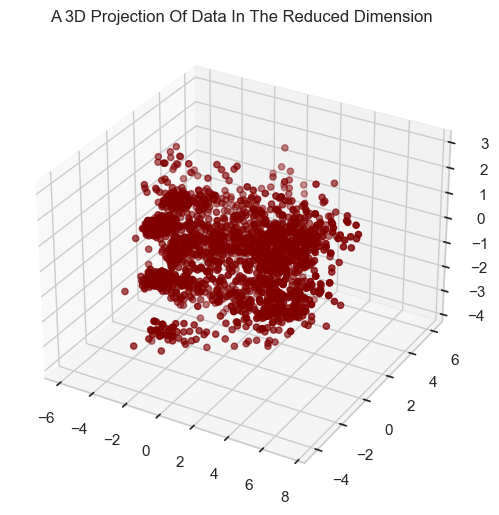

In [468]:
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='maroon', marker='o')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# <b><center> "CLUSTERING - CUSTOMER SEGMENTATION"

Elbow Method to determine the number of clusters to be formed:


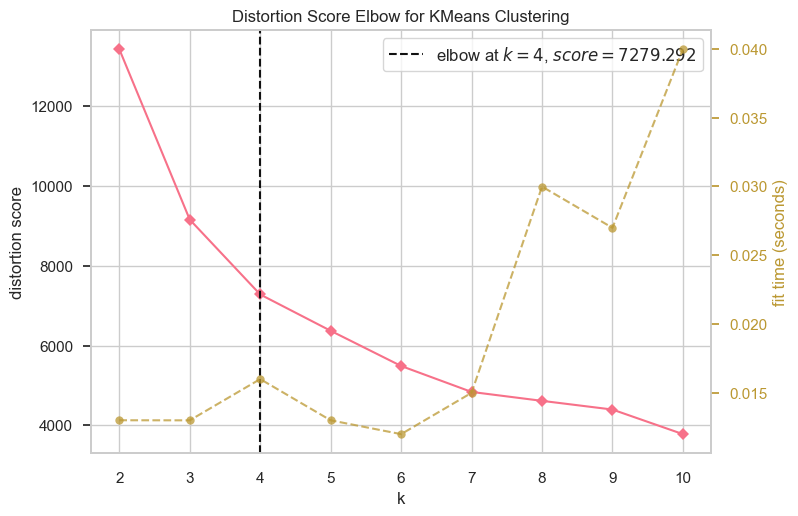

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [475]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [479]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(PCA_ds)
PCA_ds['Clusters'] = cluster_labels
data['Cluster'] = cluster_labels
scaled_ds['Cluster'] = cluster_labels

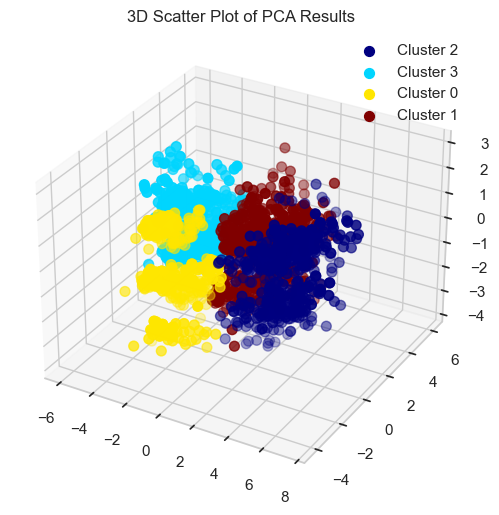

In [522]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

clusters = PCA_ds['Clusters'].unique()

colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

# <center><b> "EVALUATING THE MODEL"

C:\Users\muham\AppData\Local\Temp\ipykernel_2160\3812327359.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




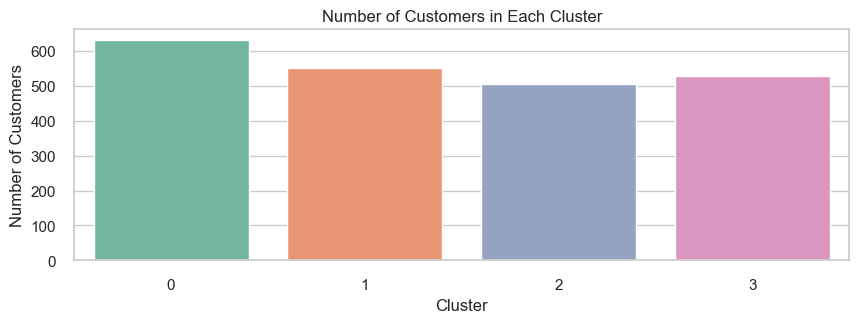

In [525]:
plt.figure(figsize=(10, 3))
sns.countplot(x=data['Cluster'], palette='Set2', data=data)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

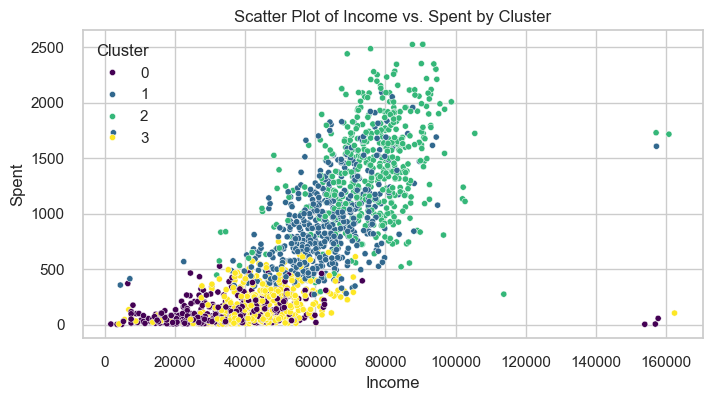

In [527]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['Income'], y=data['Spent'], hue=data['Cluster'], palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()